In [68]:
## first preprocess all the chats
# converting the chat into dataframe
import re # regular expression
import pandas as pd

In [69]:
chat = open('WhatsApp Chat with IBC 3rd Year✨.txt','r',encoding = 'utf-8')

In [70]:
data =  chat.read()  ## the type of the data will be string

In [71]:
pattern = "\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s-\s"
messages = re.split(pattern,data)[1:]  ## the above pattern is a regex pattern to split chats into
## dates and the useer name and the message content

In [72]:
len(messages)

16442

In [73]:
messages


["IBC'22 Smita Dharwa: Toh kb krun???\n",
 "IBC'22 Smita Dharwa: To join the meeting on Google Meet, click this link: \nhttps://meet.google.com/ovm-xovb-fgy \n \nOr open Meet and enter this code: ovm-xovb-fgy\n",
 "IBC'22 Smita Dharwa: Karo join\n",
 "IBC'22 Smita Dharwa: Or jldi khatm krenge\n",
 "IBC'22 Smita Dharwa: Are krr lo yrrr itna bhi kya aalas\n",
 "IBC'22 Rishikesh Kadam: vro tere aaj koi plan kese nhi h??\n",
 "IBC'22 Smita Dharwa: 🥱🥱🥱\n",
 "IBC'22 Rishikesh Kadam: F\n",
 "IBC'22 Smita Dharwa: Meet join kr\n",
 "IBC'22 Karthikeya Sai Datt Dandibhotla: @918949982873\n",
 "IBC'22 Karthikeya Sai Datt Dandibhotla: @918949982873\n",
 "IBC'22 Karthikeya Sai Datt Dandibhotla: @918949982873\n",
 "IBC'22 Rishikesh Kadam: what\n",
 "IBC'22 Karthikeya Sai Datt Dandibhotla: .\n",
 "IBC'22 Rishikesh Kadam: inn to karo\n",
 "IBC'22 Smita Dharwa: @918107951767\n",
 "IBC'22 Karthikeya Sai Datt Dandibhotla: @918107951767\n",
 "IBC'22 Palak mahalgamaiya: Logistics ki meet h kya\n",
 "IBC'22 

In [74]:
dates = re.findall(pattern,data);

In [75]:
#dates

df  = pd.DataFrame({'user_messages': messages,'message_date':dates}) 
## column for the messages and the dates
df['message_date'] = pd.to_datetime(df['message_date'],format = '%d/%m/%Y, %H:%M - ')

In [76]:
df['message_date']

0       2023-02-14 22:03:00
1       2023-02-14 22:05:00
2       2023-02-14 22:05:00
3       2023-02-14 22:05:00
4       2023-02-14 22:07:00
                ...        
16437   2024-06-21 18:46:00
16438   2024-06-21 20:15:00
16439   2024-06-21 20:30:00
16440   2024-06-27 00:05:00
16441   2024-06-27 00:36:00
Name: message_date, Length: 16442, dtype: datetime64[ns]

In [77]:
df.rename(columns = {'message_date':'dates'},inplace = True)

In [78]:
df['dates']
df['user_messages']
df

,user_messages,dates
0,IBC'22 Smita Dharwa: Toh kb krun???\n,2023-02-14 22:03:00
1,IBC'22 Smita Dharwa: To join the meeting on Go...,2023-02-14 22:05:00
2,IBC'22 Smita Dharwa: Karo join\n,2023-02-14 22:05:00
3,IBC'22 Smita Dharwa: Or jldi khatm krenge\n,2023-02-14 22:05:00
4,IBC'22 Smita Dharwa: Are krr lo yrrr itna bhi ...,2023-02-14 22:07:00
...,...,...
16437,IBC'22 Achyuta Gupta: Happy Birthday @91852709...,2024-06-21 18:46:00
16438,IBC'22 Ashutosh Ojha: Happy Birthday @⁨Khushi ...,2024-06-21 20:15:00
16439,IBC'22 Gautam Sharma: This message was deleted\n,2024-06-21 20:30:00
16440,IBC'22 Rishikesh Kadam: null\n,2024-06-27 00:05:00


In [79]:
users = []
messages = []



for record in df['user_messages']:
    entry = re.split('([\w\W]+?):\s',record)
    if  entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        


In [80]:
df['user'] = users
df['message']=messages

In [81]:
df.head()

,user_messages,dates,user,message
0,IBC'22 Smita Dharwa: Toh kb krun???\n,2023-02-14 22:03:00,IBC'22 Smita Dharwa,Toh kb krun???\n
1,IBC'22 Smita Dharwa: To join the meeting on Go...,2023-02-14 22:05:00,IBC'22 Smita Dharwa,
2,IBC'22 Smita Dharwa: Karo join\n,2023-02-14 22:05:00,IBC'22 Smita Dharwa,Karo join\n
3,IBC'22 Smita Dharwa: Or jldi khatm krenge\n,2023-02-14 22:05:00,IBC'22 Smita Dharwa,Or jldi khatm krenge\n
4,IBC'22 Smita Dharwa: Are krr lo yrrr itna bhi ...,2023-02-14 22:07:00,IBC'22 Smita Dharwa,Are krr lo yrrr itna bhi kya aalas\n


In [90]:
df['Year'] = df['dates'].dt.year

df['Month'] = df['dates'].dt.month_name()

df['Day'] = df['dates'].dt.day
df['Hour'] = df['dates'].dt.hour
df['Minute'] = df['dates'].dt.minute

In [151]:
df[df['message'] == '<Media omitted>/n'].shape
df


,user_messages,dates,user,message,Year,Month,Day,Hour,Minute
0,IBC'22 Smita Dharwa: Toh kb krun???\n,2023-02-14 22:03:00,IBC'22 Smita Dharwa,Toh kb krun???\n,2023,February,14,22,3
1,IBC'22 Smita Dharwa: To join the meeting on Go...,2023-02-14 22:05:00,IBC'22 Smita Dharwa,,2023,February,14,22,5
2,IBC'22 Smita Dharwa: Karo join\n,2023-02-14 22:05:00,IBC'22 Smita Dharwa,Karo join\n,2023,February,14,22,5
3,IBC'22 Smita Dharwa: Or jldi khatm krenge\n,2023-02-14 22:05:00,IBC'22 Smita Dharwa,Or jldi khatm krenge\n,2023,February,14,22,5
4,IBC'22 Smita Dharwa: Are krr lo yrrr itna bhi ...,2023-02-14 22:07:00,IBC'22 Smita Dharwa,Are krr lo yrrr itna bhi kya aalas\n,2023,February,14,22,7
...,...,...,...,...,...,...,...,...,...
16437,IBC'22 Achyuta Gupta: Happy Birthday @91852709...,2024-06-21 18:46:00,IBC'22 Achyuta Gupta,Happy Birthday @918527096683 🥳🥳\n,2024,June,21,18,46
16438,IBC'22 Ashutosh Ojha: Happy Birthday @⁨Khushi ...,2024-06-21 20:15:00,IBC'22 Ashutosh Ojha,Happy Birthday @⁨Khushi Thapar⁩ 🥳\n,2024,June,21,20,15
16439,IBC'22 Gautam Sharma: This message was deleted\n,2024-06-21 20:30:00,IBC'22 Gautam Sharma,This message was deleted\n,2024,June,21,20,30
16440,IBC'22 Rishikesh Kadam: null\n,2024-06-27 00:05:00,IBC'22 Rishikesh Kadam,null\n,2024,June,27,0,5


In [96]:
pip install urlextract

In [98]:

## calcularting the percentage of chats of each user
(df['user'].value_counts()/df.shape[0])*100



user
IBC'22 Khushi Thapar                      21.171390
IBC'22 Rishikesh Kadam                    20.228683
IBC'22 Smita Dharwa                       15.776670
IBC'22 Twisha Nayak                       10.321129
IBC'22 Yashwardhan Tripathi                6.361756
IBC'22 Arnav Dubey                         3.691765
IBC'22 Gautam Sharma                       3.186960
IBC'22 Jatin Chaudhari                     3.053157
IBC'22 Hanumesh Asawa                      2.438876
IBC'22 Aashika Dhare                       2.116531
IBC'22 Arin Jain                           1.496168
IBC'22 Karthikeya Sai Datt Dandibhotla     1.374529
Arpit Jain                                 1.265053
IBC'22 Ashutosh Ojha                       0.930544
IBC'22 Achyuta Gupta                       0.802822
IBC'22 Harsh bobade                        0.766330
IBC'22 Udit Kumar Mishra                   0.760248
IBC'22 Nistha Singh                        0.662936
IBC'22 Jahnavi Gupta                       0.656854
IBC'22 

In [117]:
temp = df[df['user']!='group_notification']
temp = temp[temp['message']!='<Media omitted>\n']
temp

hinglish = open('stop_hinglish.txt','r')
stopwords = hinglish.read()
print(stopwords)


.
..
...
?
-
--
+91
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could


In [123]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords:
            words.append(word)
    
    
words

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))


,0,1
0,(file,886
1,attached),886
2,happy,296
3,birthday,288
4,😂,287
5,message,280
6,meet,277
7,😂😂,245
8,kaam,244
9,deleted,222


ModuleNotFoundError: No module named 'emoji'

In [126]:
pip install emoji


   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
    --------------------------------------- 10.2/431.4 kB ? eta -:--:--
    --------------------------------------- 10.2/431.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/431.4 kB 325.1 kB/s eta 0:00:02
   ------- ------------------------------- 81.9/431.4 kB 508.4 kB/s eta 0:00:01
   --------------- ---------------------- 174.1/431.4 kB 952.6 kB/s eta 0:00:01
   ----------------------------- ---------- 317.4/431.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 431.4/431.4 kB 1.5 MB/s eta 0:00:00


In [137]:
## analysing the emojis
import emoji

    

In [145]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [150]:
emojis
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(emojis)))
emoji_df

,0,1
0,😂,1644
1,🙂,472
2,🥳,455
3,🥲,336
4,🌚,180
...,...,...
185,👮,1
186,🏋,1
187,🌟,1
188,🃏,1


In [154]:
timeline = df.groupby(['Year','Month']).count()['message'].reset_index()

In [155]:
timeline

,Year,Month,message
0,2023,April,668
1,2023,August,2885
2,2023,December,1212
3,2023,February,532
4,2023,July,799
5,2023,June,552
6,2023,March,3207
7,2023,May,875
8,2023,November,257
9,2023,October,471


In [159]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + '-' + str(timeline['Year'][i]))

timeline['time'] = time

In [160]:
timeline

,Year,Month,message,time
0,2023,April,668,April-2023
1,2023,August,2885,August-2023
2,2023,December,1212,December-2023
3,2023,February,532,February-2023
4,2023,July,799,July-2023
5,2023,June,552,June-2023
6,2023,March,3207,March-2023
7,2023,May,875,May-2023
8,2023,November,257,November-2023
9,2023,October,471,October-2023


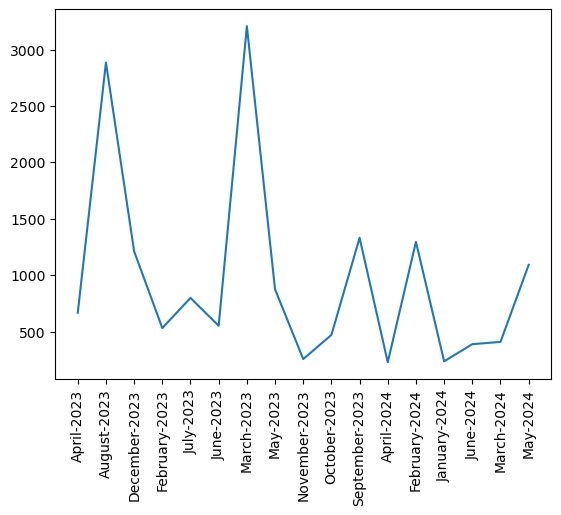

In [163]:
import matplotlib.pyplot as plt
plt.xticks(rotation = 'vertical')
plt.plot(timeline['time'],timeline['message'])

In [165]:
df['day_name'] = df['dates'].dt.day_name()

In [166]:
df

,user_messages,dates,user,message,Year,Month,Day,Hour,Minute,day_name
0,IBC'22 Smita Dharwa: Toh kb krun???\n,2023-02-14 22:03:00,IBC'22 Smita Dharwa,Toh kb krun???\n,2023,February,14,22,3,Tuesday
1,IBC'22 Smita Dharwa: To join the meeting on Go...,2023-02-14 22:05:00,IBC'22 Smita Dharwa,,2023,February,14,22,5,Tuesday
2,IBC'22 Smita Dharwa: Karo join\n,2023-02-14 22:05:00,IBC'22 Smita Dharwa,Karo join\n,2023,February,14,22,5,Tuesday
3,IBC'22 Smita Dharwa: Or jldi khatm krenge\n,2023-02-14 22:05:00,IBC'22 Smita Dharwa,Or jldi khatm krenge\n,2023,February,14,22,5,Tuesday
4,IBC'22 Smita Dharwa: Are krr lo yrrr itna bhi ...,2023-02-14 22:07:00,IBC'22 Smita Dharwa,Are krr lo yrrr itna bhi kya aalas\n,2023,February,14,22,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...
16437,IBC'22 Achyuta Gupta: Happy Birthday @91852709...,2024-06-21 18:46:00,IBC'22 Achyuta Gupta,Happy Birthday @918527096683 🥳🥳\n,2024,June,21,18,46,Friday
16438,IBC'22 Ashutosh Ojha: Happy Birthday @⁨Khushi ...,2024-06-21 20:15:00,IBC'22 Ashutosh Ojha,Happy Birthday @⁨Khushi Thapar⁩ 🥳\n,2024,June,21,20,15,Friday
16439,IBC'22 Gautam Sharma: This message was deleted\n,2024-06-21 20:30:00,IBC'22 Gautam Sharma,This message was deleted\n,2024,June,21,20,30,Friday
16440,IBC'22 Rishikesh Kadam: null\n,2024-06-27 00:05:00,IBC'22 Rishikesh Kadam,null\n,2024,June,27,0,5,Thursday


In [167]:
df['day_name'].value_counts()

day_name
Monday       3512
Friday       2971
Wednesday    2269
Thursday     2052
Sunday       2027
Tuesday      1966
Saturday     1645
Name: count, dtype: int64